/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


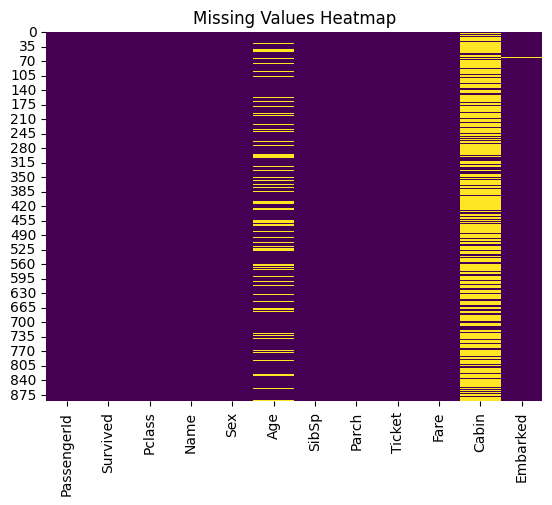

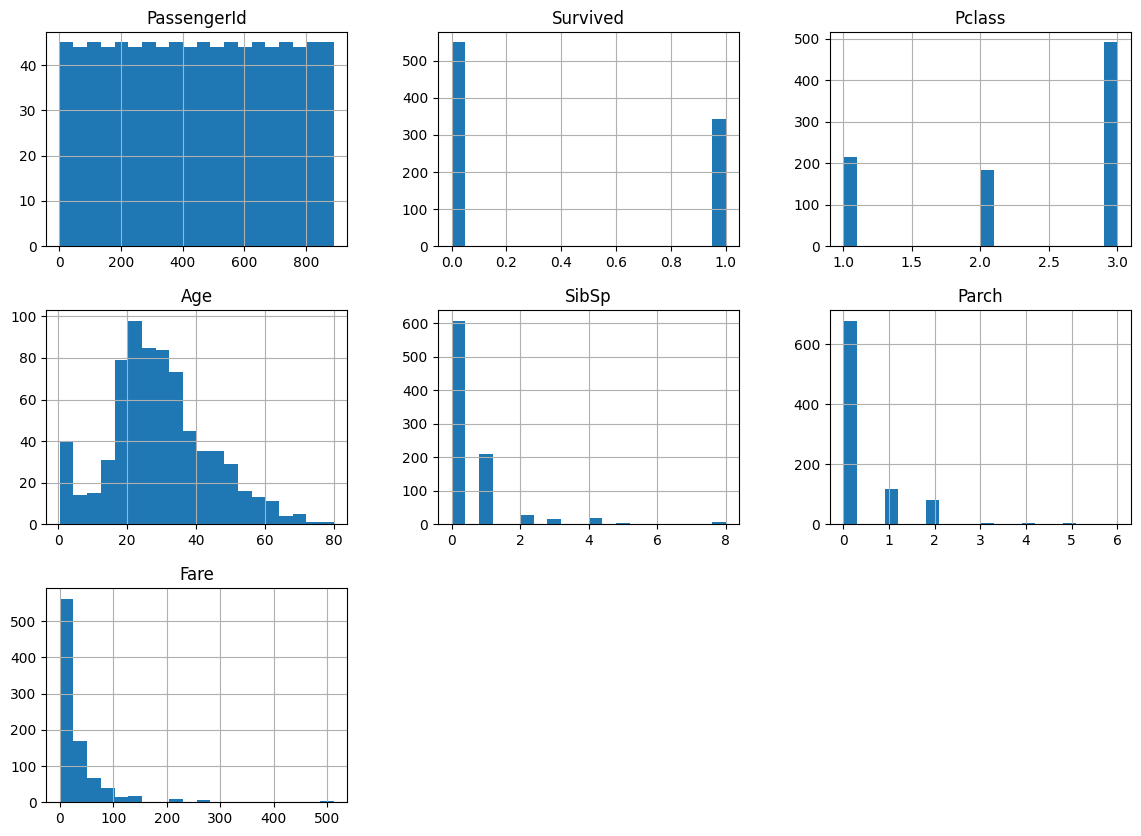

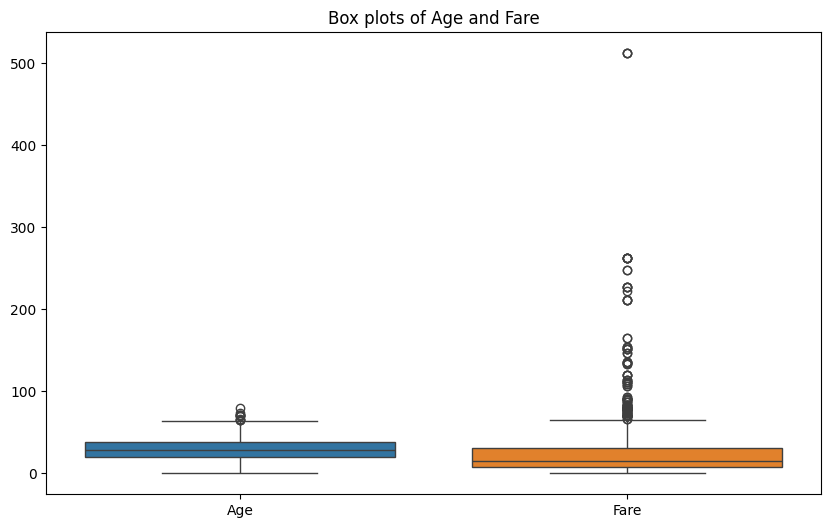

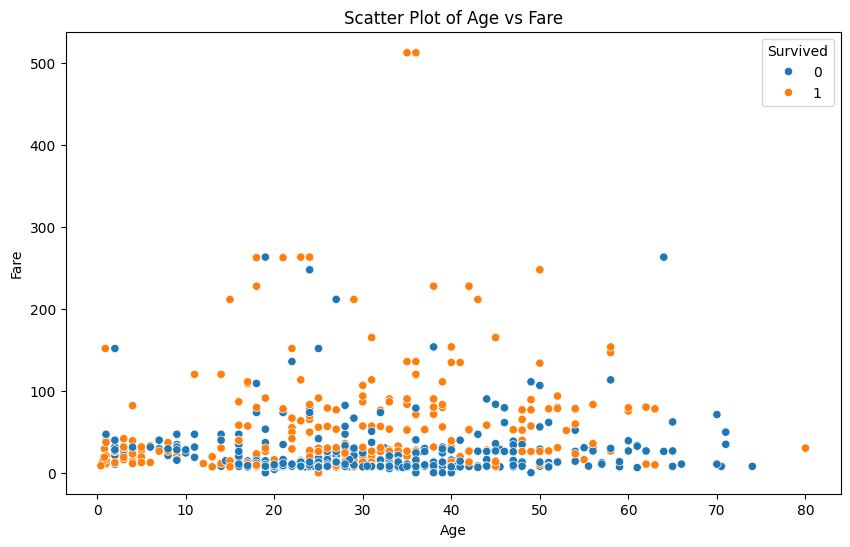

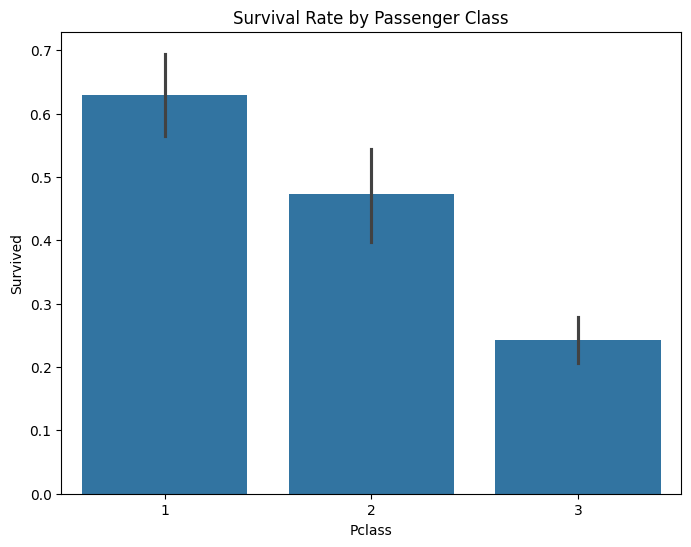

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


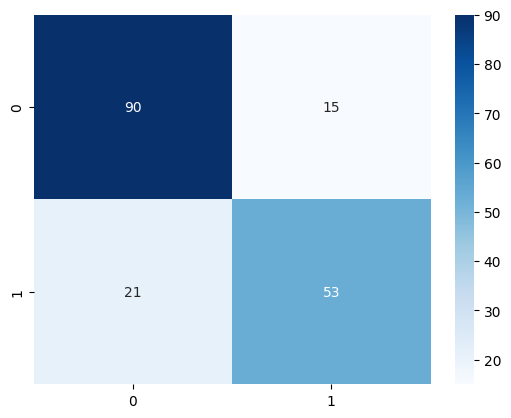

XGBoost Performance:
Accuracy: 0.7932960893854749
Precision: 0.7534246575342466
Recall: 0.7432432432432432
F1 Score: 0.7482993197278911

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



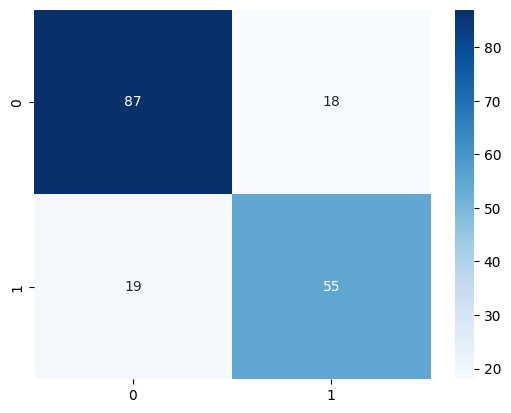

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

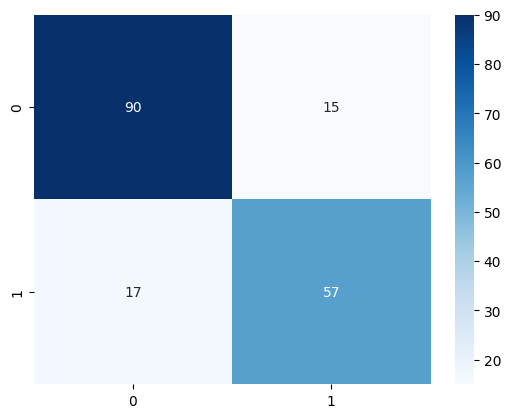

Tuned XGBoost Performance:
Accuracy: 0.8044692737430168
Precision: 0.8
Recall: 0.7027027027027027
F1 Score: 0.7482014388489208

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



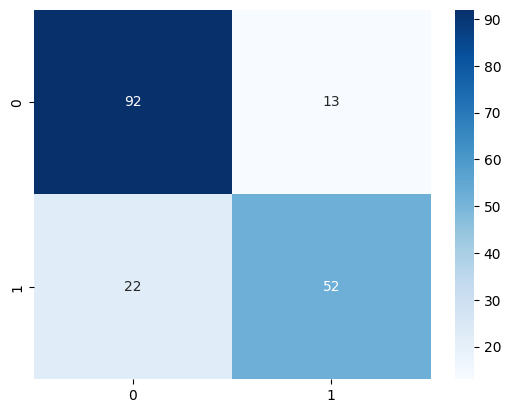

            Model  Accuracy  Precision    Recall  F1 Score
0        LightGBM  0.798883   0.779412  0.716216  0.746479
1         XGBoost  0.793296   0.753425  0.743243  0.748299
2  Tuned LightGBM  0.821229   0.791667  0.770270  0.780822
3   Tuned XGBoost  0.804469   0.800000  0.702703  0.748201


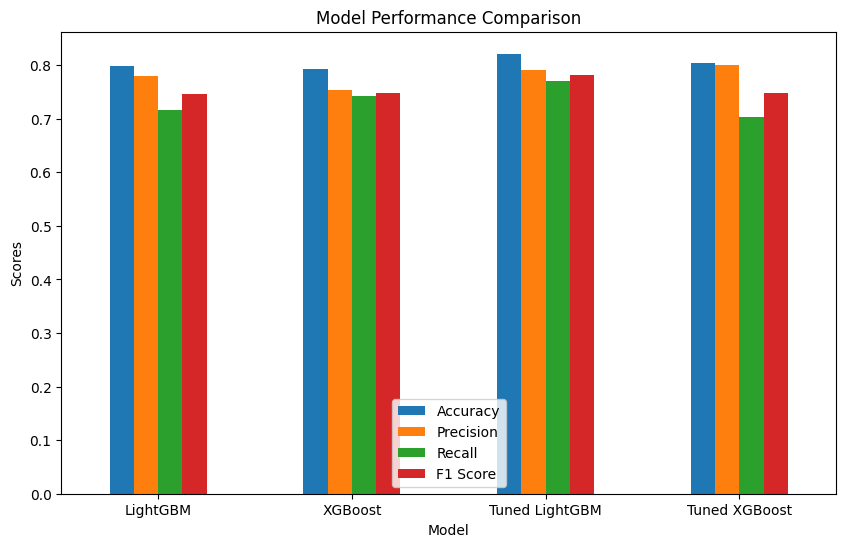

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Step 2: Load the Titanic Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

# Histograms for numerical features
df.hist(bins=20, figsize=(14,10))
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Box plots of Age and Fare')
plt.show()

# Scatter plot of Age vs Fare colored by Survival
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot of Age vs Fare')
plt.show()

# Bar plot of Pclass vs Survival
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Step 4: Data Preprocessing
# Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop columns that are not useful for prediction
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical variables to dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Step 5: Building Predictive Models
# Split the dataset into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train and Evaluate Models
# LightGBM Classifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation metrics
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.show()

print("LightGBM Performance:")
evaluate_model(y_test, y_pred_lgbm)

print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

# Step 7: Hyperparameter Tuning (Optional)
param_grid_lgbm = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 500]
}
grid_lgbm = GridSearchCV(LGBMClassifier(), param_grid_lgbm, cv=5, scoring='accuracy')
grid_lgbm.fit(X_train, y_train)
print("Best parameters for LightGBM:", grid_lgbm.best_params_)

param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 500]
}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Retrain with best parameters
lgbm_best = LGBMClassifier(**grid_lgbm.best_params_)
lgbm_best.fit(X_train, y_train)
y_pred_lgbm_best = lgbm_best.predict(X_test)

xgb_best = XGBClassifier(**grid_xgb.best_params_)
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)

print("Tuned LightGBM Performance:")
evaluate_model(y_test, y_pred_lgbm_best)

print("Tuned XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb_best)

# Step 8: Comparative Analysis Visualization
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Tuned LightGBM', 'Tuned XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lgbm), accuracy_score(y_test, y_pred_xgb),
                 accuracy_score(y_test, y_pred_lgbm_best), accuracy_score(y_test, y_pred_xgb_best)],
    'Precision': [precision_score(y_test, y_pred_lgbm), precision_score(y_test, y_pred_xgb),
                  precision_score(y_test, y_pred_lgbm_best), precision_score(y_test, y_pred_xgb_best)],
    'Recall': [recall_score(y_test, y_pred_lgbm), recall_score(y_test, y_pred_xgb),
               recall_score(y_test, y_pred_lgbm_best), recall_score(y_test, y_pred_xgb_best)],
    'F1 Score': [f1_score(y_test, y_pred_lgbm), f1_score(y_test, y_pred_xgb),
                 f1_score(y_test, y_pred_lgbm_best), f1_score(y_test, y_pred_xgb_best)]
})

print(results)

# Visualize the results
results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()
